# Testing some things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import foxes
import foxes.variables as FV

import sys
sys.path.append( '/home/sengers/code/python/')
from util import *

## Plot cross sections

In [5]:
## Initialize
range_WDs = [270] ## define WDs
range_yawms =  [30] ## define yawms
sdata = pd.DataFrame(index=range(len(range_WDs)*len(range_yawms)))
sdata[FV.WS] = 8.0
sdata[FV.WD] = np.sort(list(range_WDs)*len(range_yawms))
yawm = np.asarray([[k,0.0] for k in range_yawms]*len(range_WDs))

## states
states = foxes.input.states.StatesTable(
    data_source=sdata,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

## Build and execute
mbook = foxes.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)

farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)


algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["PorteAgel_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)
farm_results = algo.calc_farm()

Turbine 0, T0: set_yawm, yawm2yaw, NREL5, kTI_05
Turbine 1, T1: set_yawm, yawm2yaw, NREL5, kTI_05


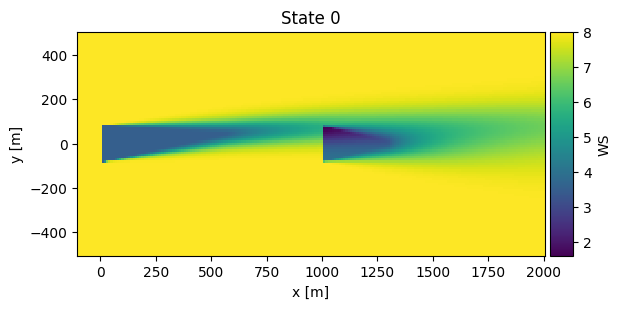

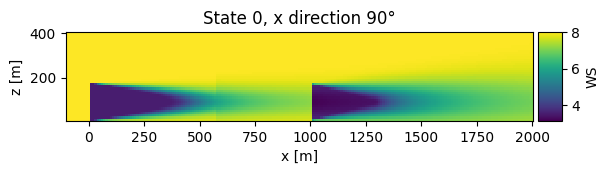

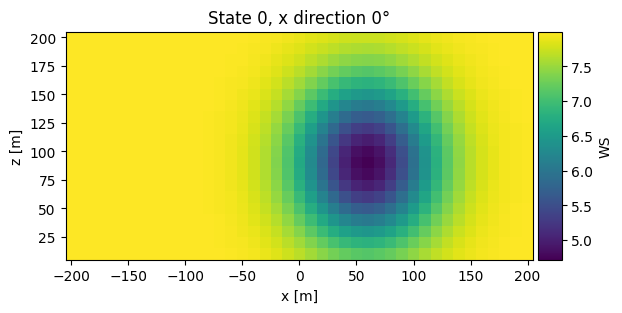

In [6]:
## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 90, y = 0, xmin=-100, xmax=2000, zmin=10, zmax=400, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()



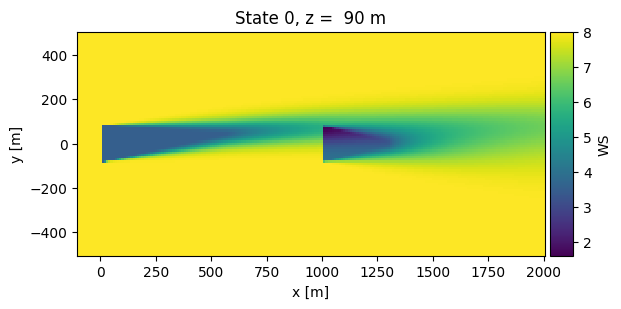

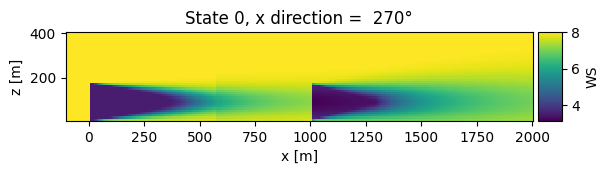

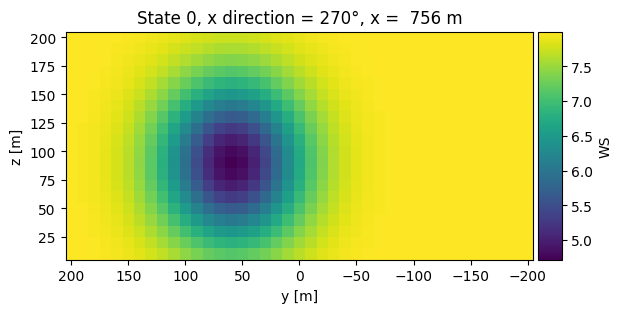

In [7]:
## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_xy(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_xz(FV.WS, resolution=10, x_direction = 270, y = 0, xmin=-100, xmax=2000, zmin=10, zmax=400, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_yz(FV.WS, resolution=10, x_direction = 270, x = 6*126, ymin=-200, ymax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()



## Generate LUT with optimal yaw misalignment

In [ ]:
## Initialize
range_WDs = np.arange(240,301,1) ## define WDs
range_yawms =  np.arange(-30,31,1) ## define yawms
sdata = pd.DataFrame(index=range(len(range_WDs)*len(range_yawms)))
sdata[FV.WS] = 8.0
sdata[FV.WD] = np.sort(list(range_WDs)*len(range_yawms))
yawm = np.asarray([[k,0.0] for k in range_yawms]*len(range_WDs))

## states
states = foxes.input.states.StatesTable(
    data_source=sdata,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

## Build and execute
mbook = foxes.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)

farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)


algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["PorteAgel_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)
farm_results = algo.calc_farm()

In [ ]:
## Results
farm_df = farm_results.to_dataframe()
df = farm_df[[FV.WD,FV.YAWM]]
df = df.query('turbine==0').droplevel(level=1)
tmp = farm_df[[FV.P]]
tmp =tmp.groupby(level=0).sum() ## sum over two turbines
df = pd.concat([df,tmp],axis=1)

## Select yaw angle with max power
new = pd.DataFrame(index=range(len(range_WDs)),columns=[FV.WD,FV.YAWM,FV.P])
new[FV.WD] = range_WDs
for i,wd in enumerate(range_WDs):
    tmp = df.query('@wd-0.1 < WD < @wd+0.1')
    new.iloc[i,:] = tmp.iloc[np.argmax(tmp[FV.P]),:]

In [ ]:
## plot
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.plot(new[FV.WD],new[FV.YAWM],'k-')
ax2.plot(new[FV.WD],new[FV.P],'r-')
ax.set_xlabel('$\delta\ [^{\circ}]$')
ax.set_ylabel('$\phi\ [^{\circ}]$')
axes_fontsize(ax,13)
axes_fontsize(ax2,13)
plt.show()

## Sheared inflow

#### Quick and dirty

In [ ]:
## Initialize

def sdata_shear(z, hh=90,WS_hh=8.0,WD_hh=270.,shear=0.2,veer=0):
    """ 
    z = heights [m]
    hh = hub height [m]
    WS_hh = wind speed at hub height [m/s]
    WD_hh = wind direction at hub height [deg]
    shear = shear exponent [-]
    veer = veer (directional shear) [deg/m]
    """
    z = np.asarray(z)
    WS = WS_hh*(z/hh)**shear
    WD = WD_hh+veer*(z-hh)
    columns =  ['WS-'+str(k) for k in z] +  ['WD-'+str(k)for k in z]
    sdata = pd.DataFrame(list(WS)+list(WD),index=columns,columns=[0])
    return sdata.T


z = range(10,510,10)
sdata = sdata_shear(z=z, hh=90., WS_hh=8., WD_hh=270., shear=0.15, veer=0/126)
yawm = [30.,0.]

fig,axes = plt.subplots(1,2,figsize=(6,3))
axes[0].plot(sdata.filter(regex='WS').iloc[0,:],z)
axes[1].plot(sdata.filter(regex='WD').iloc[0,:],z)
axes[0].set_xlabel('WS [m/s]')
axes[1].set_xlabel('WD [deg]')
axes[0].set_ylabel('z [m]')
plt.show()


In [ ]:
## Build and execute
mbook = foxes.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)

farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)

## states
states = foxes.input.states.MultiHeightTimeseries(
    data_source=sdata,
    heights=z,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["PorteAgel_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)
states.initialize(algo, states_loc=[0])
farm_results = algo.calc_farm()


In [ ]:
## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 90, y = 0, xmin=-100, xmax=2000, zmin=10, zmax=400, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()

#### Full dev

Turbine 0, T0: set_yawm, yawm2yaw, NREL5, kTI_05
Turbine 1, T1: set_yawm, yawm2yaw, NREL5, kTI_05


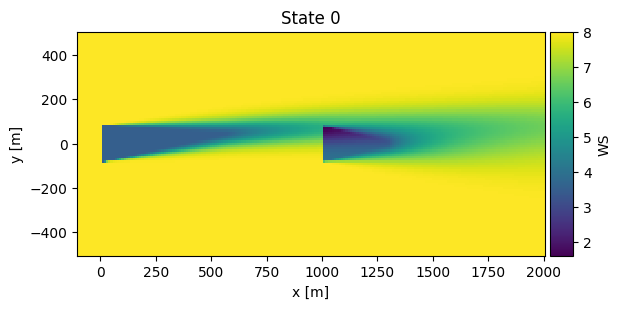

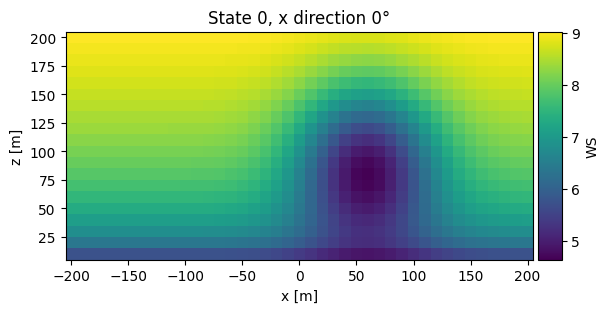

In [6]:
## Ini
df = pd.DataFrame([8.,270.,0.15,0.05],columns=[0],index=['ws','wd','shear','ti']).T ## create state df
yawm = [30.,0.]

## Build and execute
mbook = foxes.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)

farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)

states = foxes.input.states.StatesTable(
    data_source=df, ## df
    output_vars=[FV.WS, FV.WD, FV.SHEAR, FV.RHO, FV.TI],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.SHEAR: "shear", FV.TI: "ti"},
    fixed_vars={FV.RHO: 1.225, FV.H: 90.0},
    profiles={FV.WS: "ShearedProfile"},
)


algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["PorteAgel_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)
states.initialize(algo, states_loc=[0])
farm_results = algo.calc_farm()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()

## Other wake models

In [ ]:
## Jensen
states.finalize(algo, farm_results, clear_mem=True)
mbook.finalize(algo, farm_results, clear_mem=True)

algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["Jensen_linear_k002", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)

farm_results = algo.calc_farm()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()

In [ ]:
## Bastankhah
states.finalize(algo, farm_results, clear_mem=True)
mbook.finalize(algo, farm_results, clear_mem=True)

algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)

farm_results = algo.calc_farm()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()

In [ ]:
## Porte-Agel
states.finalize(algo, farm_results, clear_mem=True)
mbook.finalize(algo, farm_results, clear_mem=True)

algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["PorteAgel_linear", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)

farm_results = algo.calc_farm()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()

In [ ]:
## TurbOPark
z = range(10,510,10)
sdata = sdata_shear(z=z, hh=90., WS_hh=8., WD_hh=270., shear=0.15, veer=0/126)
yawm = [30.,0.]

## Build and execute
mbook = foxes.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)
mbook.turbine_models["set_yawm"] = foxes.models.turbine_models.SetFarmVars()
mbook.turbine_models["set_yawm"].add_var(FV.YAWM, yawm)

farm = foxes.WindFarm()
farm.add_turbine(
    foxes.Turbine(
        xy=[0.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)
farm.add_turbine(
    foxes.Turbine(
        xy=[1000.0, 0.0],
        turbine_models=["set_yawm", "yawm2yaw", "NREL5", "kTI_05"],
    )
)

## states
states = foxes.input.states.MultiHeightTimeseries(
    data_source=sdata,
    heights=z,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

algo = foxes.algorithms.Downwind(
    mbook,
    farm,
    states,
    rotor_model="centre",
    wake_models=["TurbOPark_linear_A002", "CrespoHernandez_max"],
    wake_frame="yawed",
    partial_wakes_model="auto",
    chunks=None,
    verbosity=0,
)
states.initialize(algo, states_loc=[0])
farm_results = algo.calc_farm()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_horizontal(FV.WS, resolution=10, xmin=-100, xmax=2000, verbosity=0)
for fig in g:
    plt.show()

## Plot
o = foxes.output.FlowPlots2D(algo, farm_results)
g = o.gen_states_fig_vertical(FV.WS, resolution=10, x_direction = 0, y = -6*126, xmin=-200, xmax=200, zmin=10, zmax=200, verbosity=0)
for fig in g:
    plt.show()